In [1]:
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt

ni: population at risk right before ti
di


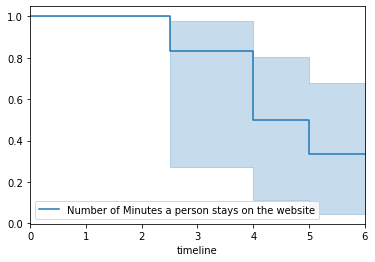

In [2]:
ax = plt.subplot(111)
duration = [5,6,6,2.5,4,4]
event_observed = [1,0,0,1,1,1]
kmf = KaplanMeierFitter()
kmf.fit(duration,event_observed, label = "Number of Minutes a person stays on the website")
kmf.plot_survival_function(ax=ax)
plt.show()

In [3]:
# q1-2
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()
# q3

df.info()
# q3

df.info()
df.isnull().sum()
# Question 4
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
# Question 5
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )
# 6- Impute the null value of total charges with the median value using the following function:
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)
# 7
durations = df['tenure']
event_observed = df['Churn']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

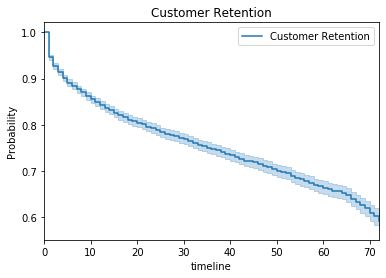

In [4]:
# 8- Create a kmf object as km
km = KaplanMeierFitter()
# 9- Fit the data into the model
km.fit(durations, event_observed,label='Customer Retention')
#10- Plot the estimated survival curve using:
km.plot()
plt.title('Customer Retention')
plt.ylabel("Probability");
# 11- Interpret the plot created in the previous step.

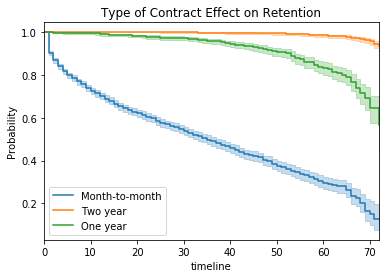

In [5]:
# 12- Create Kalan Meier curves for three cohorts:
kmf = KaplanMeierFitter()
T = df['tenure'] ## time to event
E = df['Churn'] ## event occurred or censored
groups = df['Contract'] ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')## Cohort 1
ix2 = (groups == 'Two year')## Cohort 2
ix3 = (groups == 'One year')## Cohort 3

# 13- Fit the cohort 1, 2 and 3 data and plot the survival curve using the following commands:

kmf.fit(T[ix1], E[ix1], label='Month-to-month')
ax = kmf.plot()
kmf.fit(T[ix2], E[ix2], label='Two year')
ax1 = kmf.plot(ax=ax)
kmf.fit(T[ix3], E[ix3], label='One year')
kmf.plot(ax=ax1)
plt.title("Type of Contract Effect on Retention")
plt.ylabel("Probability");
#14- Interpret the plot created in the previous step. How does the length of contract affect retention?
#15- Add the appropriate legend and title to the graph created in the previous step.

Those who have Two year contract have a clearly higher probability of retention compared to 1-year and month-month.
One yearr contracts start off similar to 2-year contracts, but begin to lose retetntion at around t=12 and begins to 


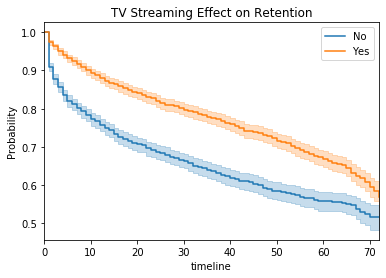

In [6]:
#16- Define two new cohorts based whether a subscriber “StreamingTV” or not “StreamingTV”.
    #We would like to know how the streaming TV option affect retention. You can create the cohorts as follow:
    
kmf1 = KaplanMeierFitter()
groups = df['StreamingTV']
i1 = (groups == 'No')
i2 = (groups == 'Yes')

kmf1.fit(T[i1], E[i1], label='No')
ax = kmf1.plot()
kmf1.fit(T[i2], E[i2], label='Yes')
ax1 = kmf1.plot(ax=ax)
plt.title("TV Streaming Effect on Retention")
plt.ylabel("Probability");

#17- Repeat the procedures in step 13 to fit the cohorts created in the previous step and plot the estimated survival curve.

# Make sure to assign the correct labels.

#18- Interpret the plot created in the previous step.
# How is the streaming TV affect retention?

Based upon the survival analysis of whether customers stream TV service, there is a clear disticntion between those who do and those that do not stream TV from time 0 - 70.  At t = 70 the probablity of retention for both groups converge and becomes similar. 

Actuaries: given risk of population, survival analysis evaluates the probability of the population to die in a particular time range.
<br>
The analysis helps the insurance companies to evaluate the insurance premiums.

Mathimatical intuition
<br>
T is a non-negative continous random variable.
<br>
T might denote: Time from the customers subscription.
<br>
time from start of a machine until its breakdown
<br>
The time from diagnosis of a disease until death.
<br>

The probablity function f(t)

Sruvival function:

S(t) gives us the probability that the event has NOT occured by time t.

Proportion of population with time to event value more than t.

Hazard fucntion:

How much risk wil be gained?

Derivative of the surivival function/survival function.

What is the rate of the which event is taking place out of the surviving population at any given t(time)
